# Proyecto Final de Data Science con Phyton
## Modelo Predictivo de Precios de Casas con Regresión Líneal
### Luis Edmundo Alvarez Soto Carné 21001844

In [44]:
#Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
#pip install scikit-learn
import sklearn as sk

In [51]:
#importar archivo
datos = np.load("proyecto_training_data.npy")

In [52]:
# Dataframe y asignación de títulos a cada columna
df = pd.DataFrame(datos,columns=["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"])
  
# print DataFrame
print(df)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
1      181500.0          6.0    1262.0           6.0     1976.0         80.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
...         ...          ...       ...           ...        ...          ...
1455   175000.0          6.0     953.0           7.0     1999.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1460 rows x 6 columns]


## Análisis Exploratorio de datos en el DataFrame

In [53]:
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Gráficas de cada Variable

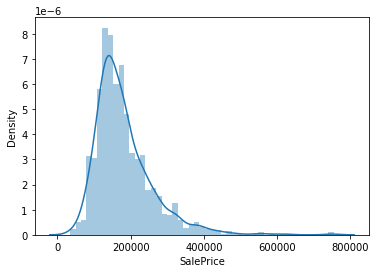

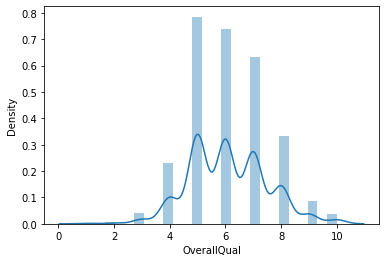

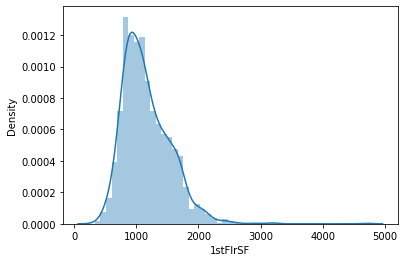

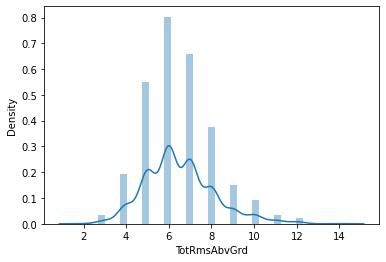

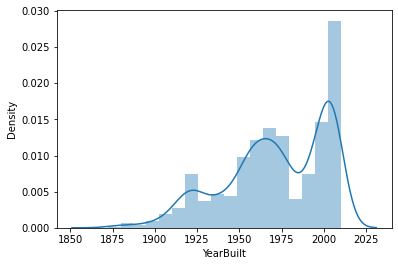

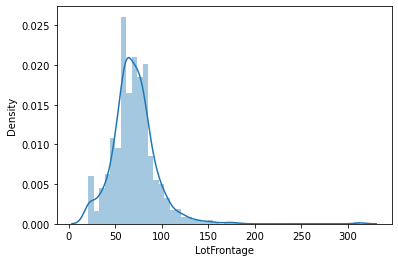

In [57]:
# desactiva mensajes futureWarnings
#import warnings
#warnings.filterwarnings("ignore")
# create distplots
for column in df.columns:
    plt.figure()
    sns.distplot(df[column])

## Coeficiente de correlación entre el Precio y demás variables

In [67]:
from scipy import stats
from scipy.stats import pearsonr
print('Correlación OverallQual: ', df['SalePrice'].corr(df['OverallQual'], method='pearson'))
print('Correlación 1stFlrSF: ', df['SalePrice'].corr(df['1stFlrSF'], method='pearson'))
print('Correlación TotRmsAbvGrd: ', df['SalePrice'].corr(df['TotRmsAbvGrd'], method='pearson'))
print('Correlación YearBuilt: ', df['SalePrice'].corr(df['YearBuilt'], method='pearson'))
print('Correlación LotFrontage: ', df['SalePrice'].corr(df['LotFrontage'], method='pearson'))
    

Correlación OverallQual:  0.7909816005838052
Correlación 1stFlrSF:  0.6058521846919145
Correlación TotRmsAbvGrd:  0.5337231555820281
Correlación YearBuilt:  0.5228973328794971
Correlación LotFrontage:  0.3517990965706781


In [15]:
#verificación de tamaño de archivo
numrows, numcols = datos.shape;
testrows = int(numrows * 0.8);
print("shape of data:",datos.shape)
print("Rows: ",numrows,testrows)
print("Cols: ",numcols)

print("datatype of data:",datos.dtype)

shape of data: (1460, 6)
Rows:  1460 1168
Cols:  6
datatype of data: float64


In [16]:
print(datos[:testrows])

[[2.0850e+05 7.0000e+00 8.5600e+02 8.0000e+00 2.0030e+03 6.5000e+01]
 [1.8150e+05 6.0000e+00 1.2620e+03 6.0000e+00 1.9760e+03 8.0000e+01]
 [2.2350e+05 7.0000e+00 9.2000e+02 6.0000e+00 2.0010e+03 6.8000e+01]
 ...
 [2.3317e+05 7.0000e+00 1.5020e+03 7.0000e+00 2.0090e+03 7.9000e+01]
 [2.4535e+05 8.0000e+00 1.6940e+03 7.0000e+00 2.0080e+03 6.4000e+01]
 [1.7300e+05 6.0000e+00 9.5900e+02 7.0000e+00 2.0000e+03 5.8000e+01]]


In [18]:
datatrain = datos[:testrows]
datatest = datos[testrows:]
print("shape of datatrain:",datatrain.shape)
print("shape of datatest:",datatest.shape)


shape of datatrain: (1168, 6)
shape of datatest: (292, 6)
